## Iris Dataset

__Attributes__

1. sepal lenght in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: i) Iris Setosa ii) Iris Versicolour iii) Iris Virginica

In [79]:
# Importing packages

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# load the dataset
ir = pd.read_csv("Iris.csv")
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
ir = ir.drop(columns = ['Id'])
ir.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
ir.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [83]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [84]:
ir.shape

(150, 5)

In [85]:
# Check the number of samples in each class
ir['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [86]:
# check for Null values
ir.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

__Exploratory Data Analysis__

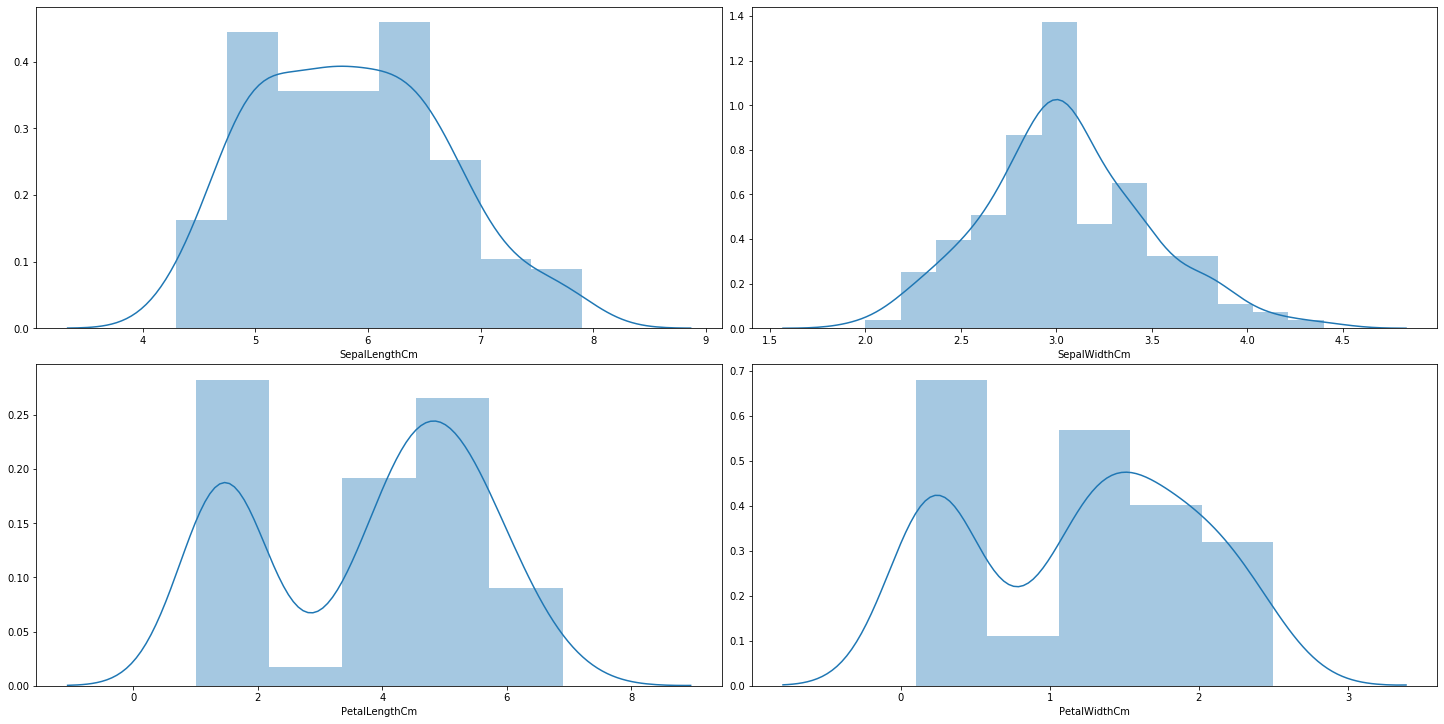

In [87]:
# histogram
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col in ir.columns:
    try: 
        sns.distplot(ir[col], ax = ax[index])
        index += 1
    except:
        pass
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 0.5)
#ir["SepalLengthCm"].hist()

In [88]:
# scatter-plot

colors = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

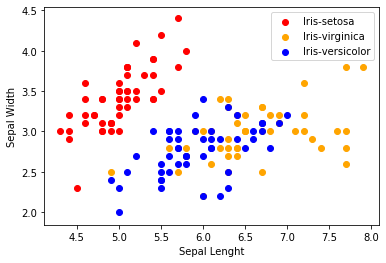

In [89]:
for i in range(3):
    x = ir[ir['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Lenght")
plt.ylabel("Sepal Width")
plt.legend()

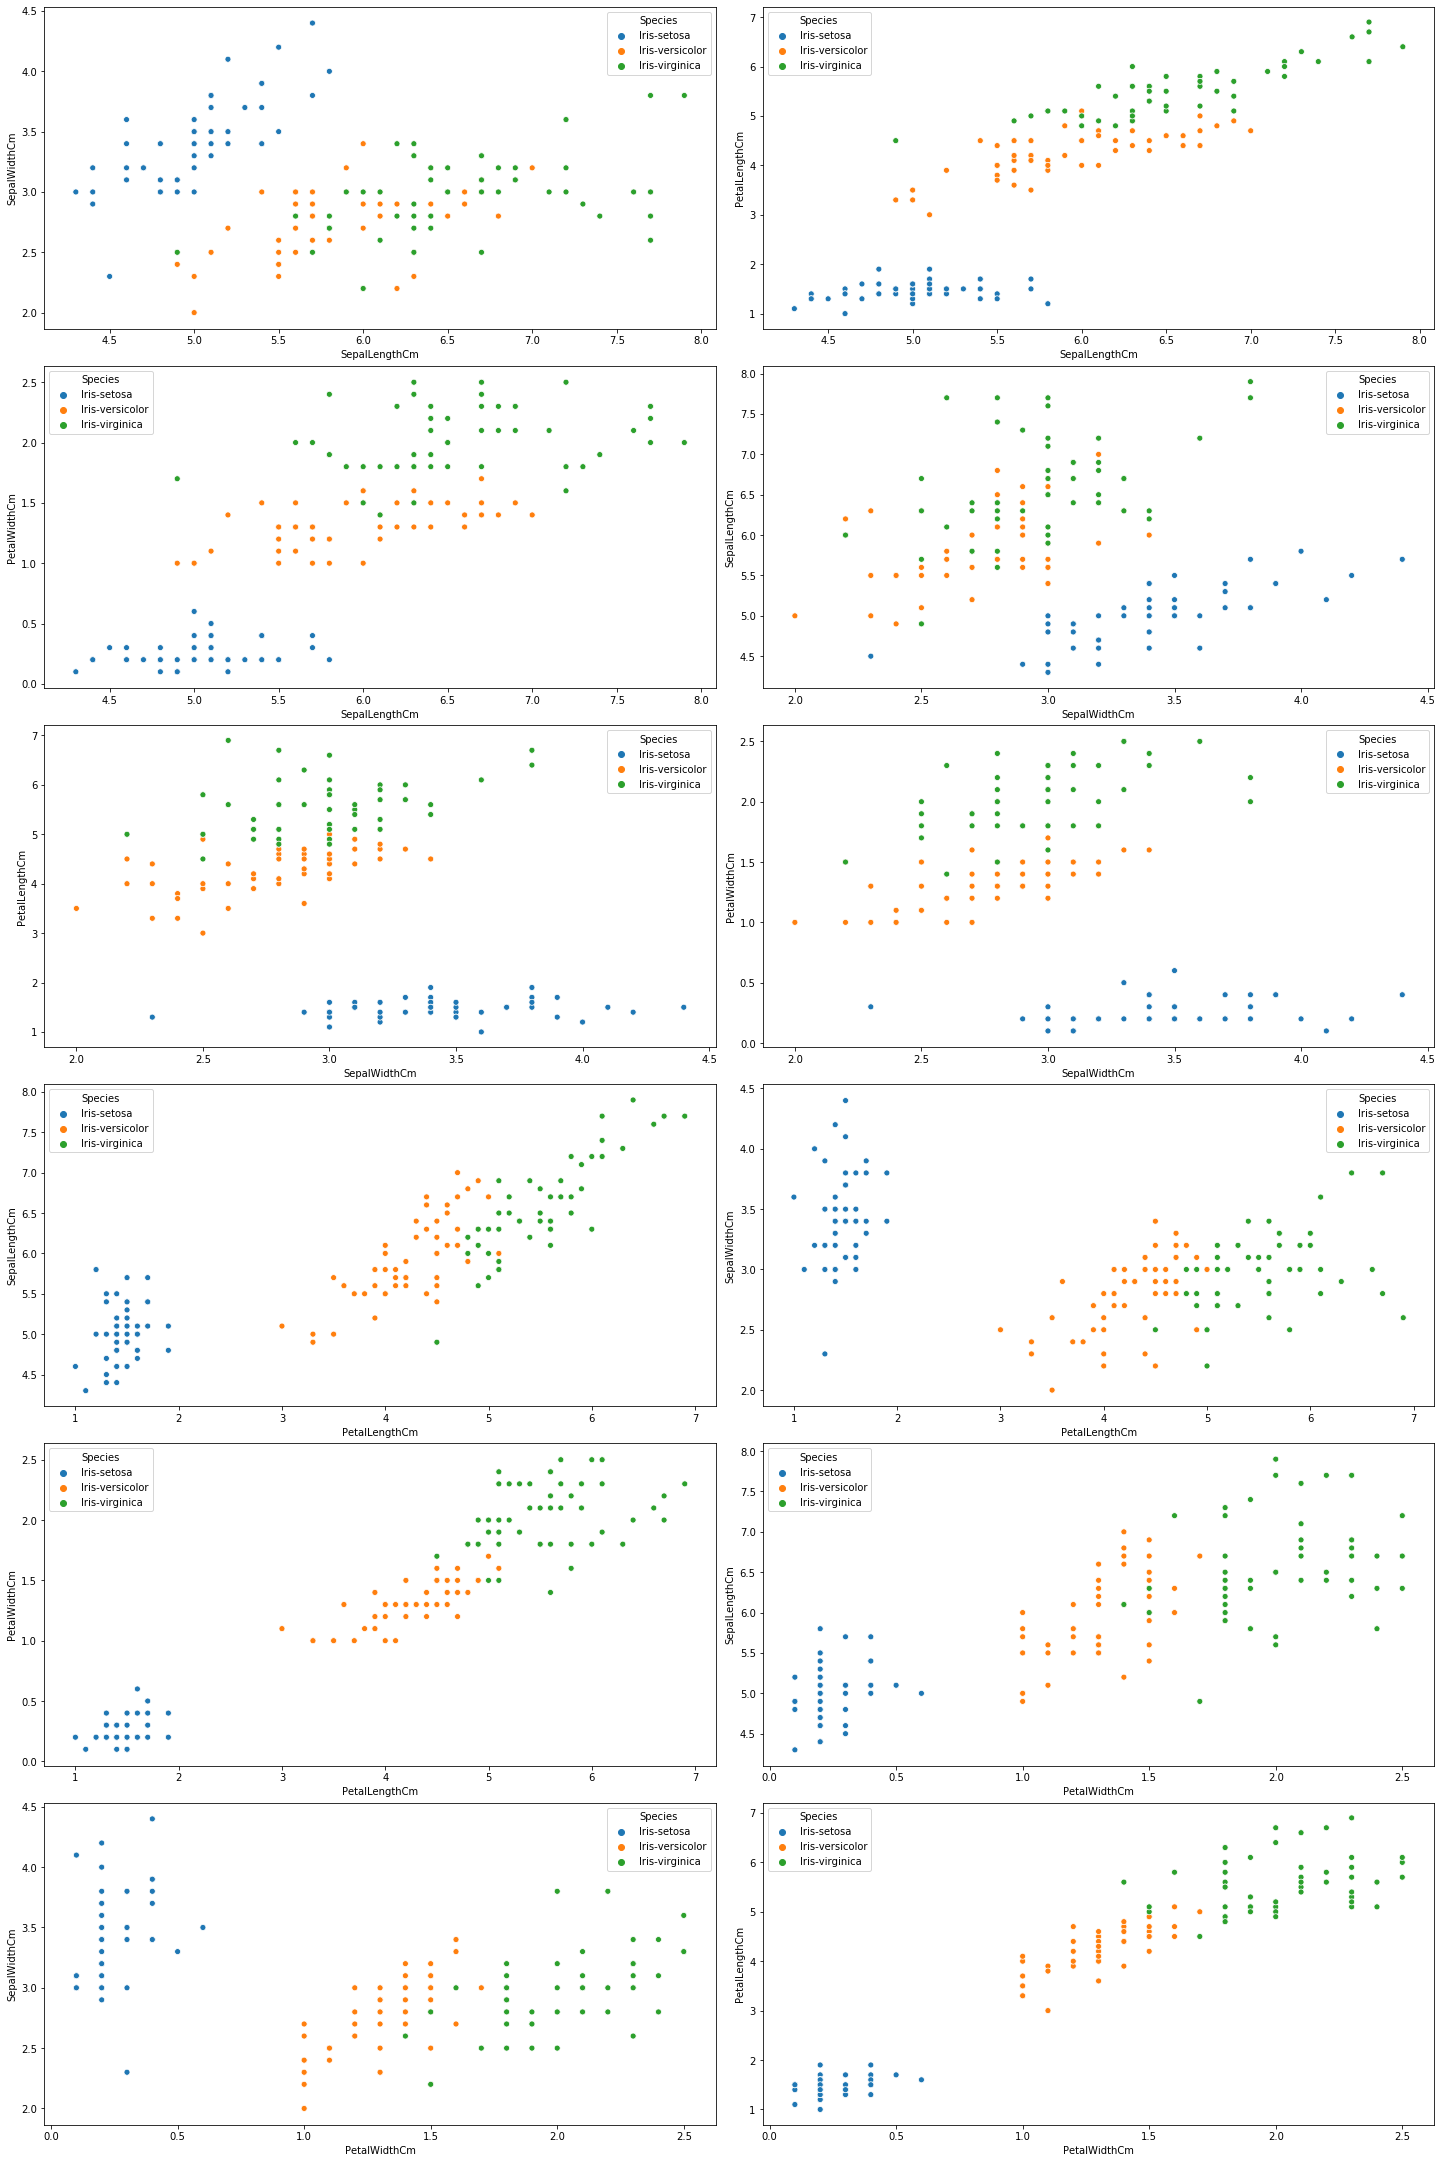

In [90]:
# histogram
fig, ax = plt.subplots(ncols = 2, nrows = 6, figsize = (20,30))
index = 0
ax = ax.flatten()

for col in ir.columns[:-1]:
    for row in ir.columns[:-1]:
        if col == row:
            continue
        try: 
            sns.scatterplot(ir[col],ir[row], hue = ir["Species"], ax = ax[index])
            index += 1
        except:
            pass
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 0.5)
#ir["SepalLengthCm"].hist()

In [91]:
# Coorelation Matrix

ir.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


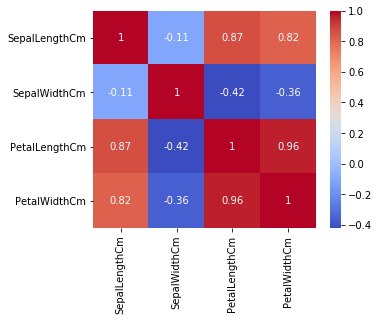

In [92]:
corr = ir.corr()
fig, ax = plt.subplots( figsize = (5,4))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

__Label Encoder__

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [94]:
ir["Species"] = le.fit_transform(ir["Species"])
ir.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


__Model Training__

In [141]:
from sklearn.model_selection import train_test_split
# train: 70
# test: 30
X = ir.drop(columns = ["Species"])
Y = ir["Species"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [142]:
# Logistic Regression
from sklearn.linear_model import LinearRegression as LR
model = LR()

In [143]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
# print performance matrix for the model

print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 94.94123370681041


In [145]:
# knn 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [146]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [147]:
# print performance matrix for the model
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 97.77777777777777


In [148]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [149]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [150]:
# print performance matrix for the model
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 95.55555555555556
